<a href="https://colab.research.google.com/github/fabriciosantana/mcdia/blob/main/01-icd/assignments/02-analise-quantitativa-discursos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise Quantitativa dos Discursos do Senado (56ª Legislatura)

Este notebook examina o conjunto de discursos proferidos no Senado Federal durante a 56ª Legislatura (01/02/2019 a 31/01/2023).

Principais objetivos:
- compreender a composição do acervo (autores, partidos, datas e metadados)
- identificar padrões temporais de produção de discursos
- analisar o tamanho dos textos e a distribuição de temas (tipos de uso da palavra)
- gerar sumários numéricos e visuais que sirvam de base para estudos posteriores

## Inicializar e carregar dados

### Importar bibliotecas

In [50]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from datasets import load_dataset
from datasets import load_dataset_builder

pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid', palette='tab10')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

### Carregar e verificar metadados do dataset

In [51]:
LOCAL_DATA_FILE = ".../_data/discursos_2019-02-01_2023-01-31.csv"

DATASET_HF_REPO = "fabriciosantana/discursos-senado-legislatura-56"
DATA_FILE_HF = {"train": "data/full/discursos_2019-02-01_2023-01-31.parquet"}

if os.path.exists(LOCAL_DATA_FILE):
    local_metadata = {
        "arquivo": str(LOCAL_DATA_FILE),
        "tamanho_MB": round(os.stat(LOCAL_DATA_FILE).st_size / (1024 * 1024), 2),
    }
    preview = pd.read_csv(LOCAL_DATA_FILE, sep=";", nrows=0)
    local_metadata["colunas"] = preview.columns.tolist()
    display(local_metadata)

    df = pd.read_csv(LOCAL_DATA_FILE, sep=";")
else:
    ds_builder = load_dataset_builder(DATASET_HF_REPO)
    display(ds_builder.info)

    dataset = load_dataset(DATASET_HF_REPO, data_files=DATA_FILE_HF)
    df = dataset["train"].to_pandas()

df

DatasetInfo(description='', citation='', homepage='', license='', features={'id': Value('string'), 'CodigoPronunciamento': Value('string'), 'Casa': Value('string'), 'Data': Value('string'), 'Resumo': Value('string'), 'Indexacao': Value('string'), 'TextoIntegral': Value('string'), 'TextoIntegralTxt': Value('string'), 'UrlTextoBinario': Value('string'), 'TipoAutor': Value('string'), 'FuncaoAutor': Value('string'), 'NomeAutor': Value('string'), 'CodigoParlamentar': Value('string'), 'Partido': Value('string'), 'UF': Value('string'), 'TipoUsoPalavra.Codigo': Value('string'), 'TipoUsoPalavra.Sigla': Value('string'), 'TipoUsoPalavra.Descricao': Value('string'), 'TipoUsoPalavra.IndicadorAtivo': Value('string'), 'Publicacoes.Publicacao': List({'DataPublicacao': Value('string'), 'FontePublicacao': Value('string'), 'PaginaFinal': Value('string'), 'PaginaInicial': Value('string'), 'SiglaFonte': Value('string'), 'TipoPublicacao': Value('string'), 'UrlDiario': Value('string')}), 'Apartes.Aparteante'

,id,CodigoPronunciamento,Casa,Data,Resumo,Indexacao,TextoIntegral,TextoIntegralTxt,UrlTextoBinario,TipoAutor,FuncaoAutor,NomeAutor,CodigoParlamentar,Partido,UF,TipoUsoPalavra.Codigo,TipoUsoPalavra.Sigla,TipoUsoPalavra.Descricao,TipoUsoPalavra.IndicadorAtivo,Publicacoes.Publicacao,Apartes.Aparteante,__janela_inicio,__janela_fim,CargoAutor,OrgaoAutor,PaisAutor,TextoDiscursoIntegral,ok,status,msg
0,451286,451286,Senado Federal,2019-02-27,Comentários a respeito da concentração bancári...,"COMENTARIO, CONCENTRAÇÃO, REDE BANCARIA, COBRA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Ciro Nogueira,739,PP,PI,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,SENADO FEDERAL SF -\nSECRETARIA-GERAL DA MESA\...,True,200,
1,451285,451285,Senado Federal,2019-02-27,Registro do impacto da reforma da previdência ...,"REGISTRO, REFORMA, PREVIDENCIA SOCIAL, ALTERAÇ...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Paulo Paim,825,PT,RS,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,SENADO FEDERAL SF -\nSECRETARIA-GERAL DA MESA\...,True,200,
2,451205,451205,Senado Federal,2019-02-27,Comentários a respeito da catástrofe ocorrida ...,"COMENTARIO, DESASTRE, ROMPIMENTO, BARRAGEM, BR...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Wellington Fagundes,1173,PR,MT,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,O SR. WELLINGTON FAGUNDES (Bloco Parlamentar V...,True,200,
3,451203,451203,Senado Federal,2019-02-27,Expectativa com o início dos trabalhos no âmbi...,"EXPECTATIVA, INICIO, TRABALHO, COMISSÕES, SENA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Confúcio Moura,475,MDB,RO,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,O SR. CONFÚCIO MOURA (Bloco Parlamentar Unidos...,True,200,
4,451202,451202,Senado Federal,2019-02-27,Relato da origem e das motivações do Projeto d...,"COMENTARIO, ORIGEM, MOTIVO, PROJETO DE LEI, OB...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Rodrigo Pacheco,5732,DEM,MG,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-02-28', 'FontePublic...",None,2019-02-01,2019-03-03,None,None,None,O SR. RODRIGO PACHECO (Bloco Parlamentar Vangu...,True,200,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15724,495469,495469,Senado Federal,2023-01-10,Discurso de posse de S. Exa.,"DISCURSO, POSSE, SENADOR.",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Lael Varella,415,DEM,MG,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2023-01-11', 'FontePublic...",None,2022-12-28,2023-01-27,None,None,None,O SR. LAEL VARELLA (DEM - MG. Para discursar.)...,True,200,
15725,495467,495467,Senado Federal,2023-01-10,"Comunidado do Senador Lael Varella, de filiaçã...","REGISTRO, SENADOR, FILIAÇÃO PARTIDARIA, PARTID...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Autor Externo,EXTERNO,LAEL VIEIRA VARELLA,None,None,None,4838,NID,Não classificado,Sim,"[{'DataPublicacao': '2023-01-11', 'FontePubl

### Analisar estrutura do dataframe

In [52]:
print(f'Linhas: {df.shape[0]} | Colunas: {df.shape[1]}')
df.info()

Linhas: 15729 | Colunas: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15729 entries, 0 to 15728
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   id                             15729 non-null  object
 1   CodigoPronunciamento           15729 non-null  object
 2   Casa                           15729 non-null  object
 3   Data                           15729 non-null  object
 4   Resumo                         15672 non-null  object
 5   Indexacao                      15694 non-null  object
 6   TextoIntegral                  15729 non-null  object
 7   TextoIntegralTxt               15729 non-null  object
 8   UrlTextoBinario                15729 non-null  object
 9   TipoAutor                      15729 non-null  object
 10  FuncaoAutor                    15729 non-null  object
 11  NomeAutor                      15729 non-null  object
 12  CodigoParlamentar              1

## Analisar qualidade dos dados

### Visão geral dos dados

In [53]:
overview = pd.DataFrame({
    'dtype': df.dtypes.astype(str),
    'missing': df.isna().sum()
}).sort_values('missing', ascending=False)
overview

,dtype,missing
PaisAutor,object,15632
OrgaoAutor,object,14918
Apartes.Aparteante,object,14861
CargoAutor,object,14825
Partido,object,2074
CodigoParlamentar,object,2074
UF,object,2074
Publicacoes.Publicacao,object,734
Resumo,object,57
Indexacao,object,35


### Métricas dos dados

In [54]:
metrics = pd.Series({
    'Discursos': len(df),
    'Autores únicos': df['NomeAutor'].nunique(),
    'Partidos únicos': df['Partido'].nunique(),
    'UFs representadas': df['UF'].replace('', np.nan).nunique(dropna=True),
    'Funções de autor únicas': df['FuncaoAutor'].replace('', np.nan).nunique(dropna=True),
    'Discursos com resumo': int((df['Resumo'].str.len() > 0).sum()),
    'Discursos com indexação': int((df['Indexacao'].str.len() > 0).sum()),
    'Discursos com texto integral': int((df['TextoDiscursoIntegral'].str.len() > 0).sum())
}).to_frame('quantidade')
metrics

,quantidade
Discursos,15729
Autores únicos,1794
Partidos únicos,32
UFs representadas,27
Funções de autor únicas,3
Discursos com resumo,15672
Discursos com indexação,15666
Discursos com texto integral,15039


### Separar dados faltantes

In [55]:
missing = (
    df.isna()
      .sum()
      .to_frame('faltantes')
      .assign(percentual=lambda s: (s['faltantes'] / len(df) * 100).round(2))
      .sort_values('faltantes', ascending=False)
)
missing.head(10)

,faltantes,percentual
PaisAutor,15632,99.38
OrgaoAutor,14918,94.84
Apartes.Aparteante,14861,94.48
CargoAutor,14825,94.25
Partido,2074,13.19
CodigoParlamentar,2074,13.19
UF,2074,13.19
Publicacoes.Publicacao,734,4.67
Resumo,57,0.36
Indexacao,35,0.22


## Analisar discursos por data
Criar campos para ano, mês e dia da semana

In [56]:
#converte o tipo para datetime
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

#cria coluna para o ano
df['ano'] = df['Data'].dt.year

#cria coluna para o mês
df['mes'] = df['Data'].dt.to_period('M')

dias_map = {
    'Monday': 'Segunda',
    'Tuesday': 'Terça',
    'Wednesday': 'Quarta',
    'Thursday': 'Quinta',
    'Friday': 'Sexta',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

#cria coluna para a semana
df['dia_semana'] = df['Data'].dt.day_name().map(dias_map)

df[["Data", "ano", "mes", "dia_semana"]].head()

,Data,ano,mes,dia_semana
0,2019-02-27,2019,2019-02,Quarta
1,2019-02-27,2019,2019-02,Quarta
2,2019-02-27,2019,2019-02,Quarta
3,2019-02-27,2019,2019-02,Quarta
4,2019-02-27,2019,2019-02,Quarta


### Discursos por ano

,ano,qtd_discursos
0,2019,3686
1,2020,1518
2,2021,5503
3,2022,4988
4,2023,34


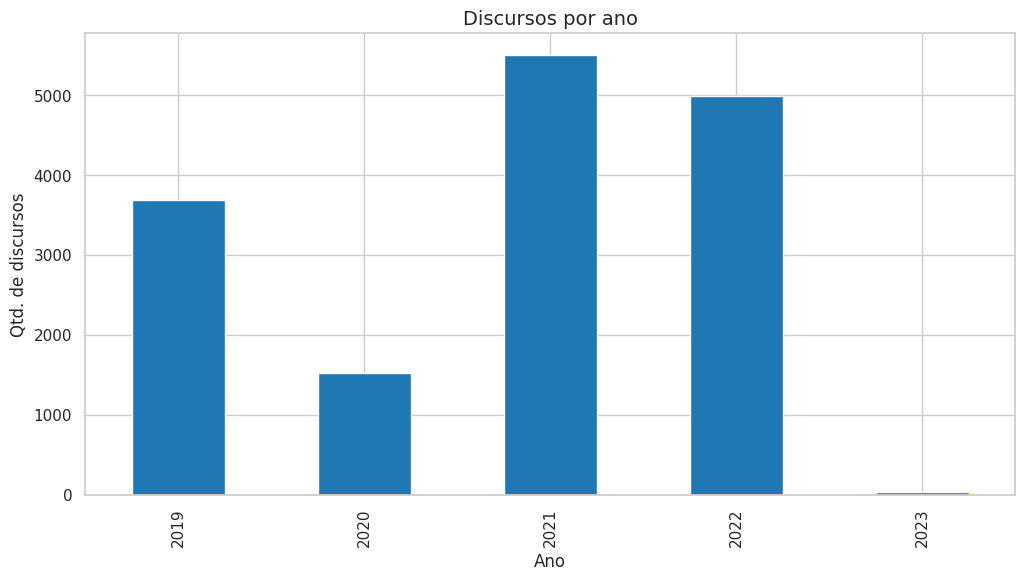

In [57]:
discursos_por_ano = (df.groupby(["ano"])
                     .size()
                     .reset_index(name="qtd_discursos")
                    )

ax = discursos_por_ano.plot(x="ano", y="qtd_discursos", kind="bar", legend=False)
ax.set_title("Discursos por ano")
ax.set_xlabel("Ano")
ax.set_ylabel("Qtd. de discursos")

discursos_por_ano

### Discursos por mês

mes
2022-09    104
2022-10    230
2022-11    244
2022-12    706
2023-01     34
Freq: M, Name: discursos, dtype: int64

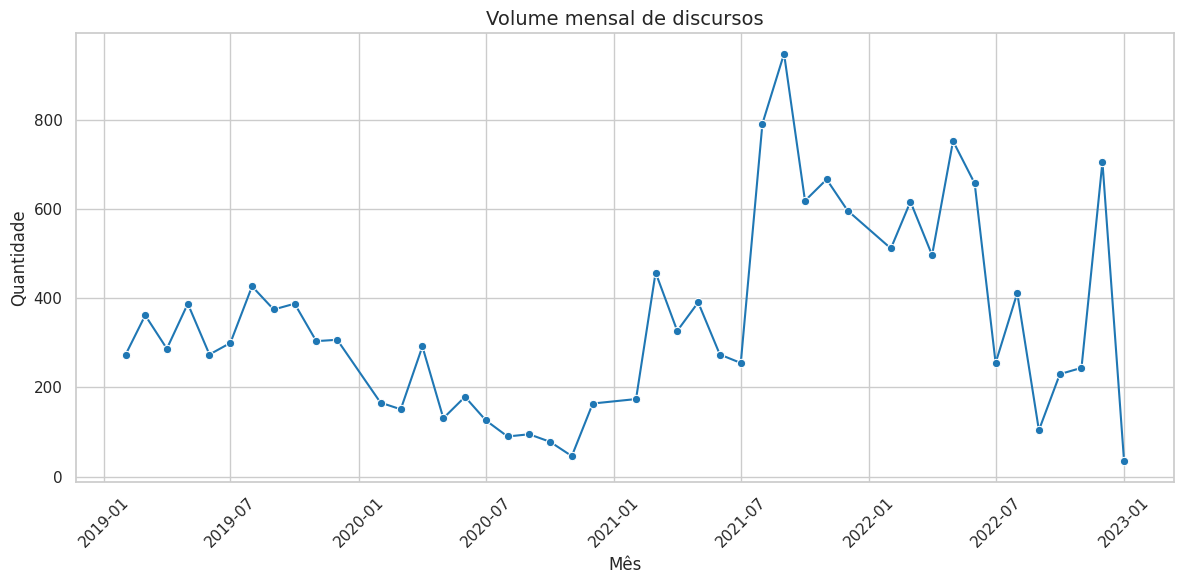

In [59]:
discursos_por_mes = (
    df.dropna(subset=['mes'])
      .groupby('mes')
      .size()
      .rename('discursos')
      .sort_index()
)

fig, ax = plt.subplots()
sns.lineplot(x=discursos_por_mes.index.to_timestamp(), y=discursos_por_mes.values, marker='o', ax=ax)
ax.set(title='Volume mensal de discursos', xlabel='Mês', ylabel='Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
discursos_por_mes.tail()

### Discursos por dia da semana

,dia_semana,discursos
0,Segunda,2070
1,Terça,4421
2,Quarta,4667
3,Quinta,2932
4,Sexta,1591


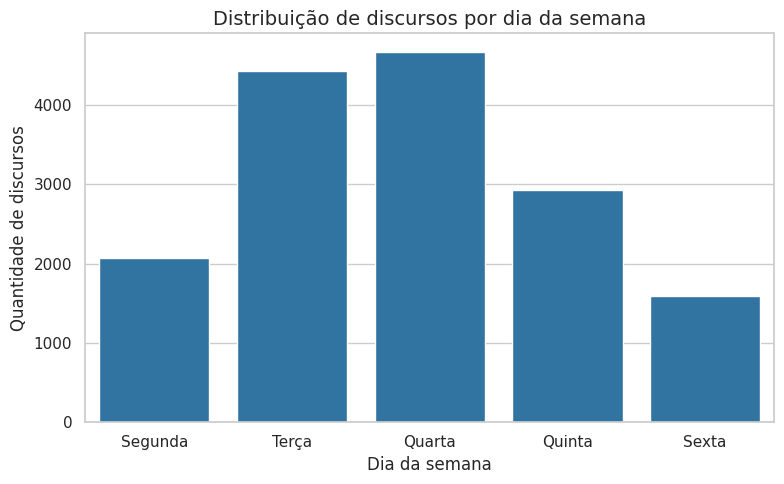

In [60]:
dias_semana = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta']
discurso_por_dia_semana = (
    df.dropna(subset=['dia_semana'])
      .groupby('dia_semana')
      .size()
      .reindex(dias_semana, fill_value=0)
      .rename('discursos')
      .reset_index()
)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=discurso_por_dia_semana,
    x="dia_semana", y="discursos",
    order=dias_semana,
    color="C0"            # usa uma cor única (evita warning do seaborn)
)
ax.set(title='Distribuição de discursos por dia da semana', 
       xlabel='Dia da semana', 
       ylabel='Quantidade de discursos'
      )

plt.tight_layout()

discurso_por_dia_semana

### Discursos anuais por partido

Partido,PT,PODEMOS,MDB,PSD,PSDB,PP,PL,DEM,PROS,CIDADANIA
ano,,,,,,,,,,
2019,465,278,289,177,326,175,69,280,124,106
2020,263,200,152,117,101,67,42,122,28,56
2021,598,592,675,453,423,358,258,347,214,219
2022,561,670,555,579,326,316,457,29,181,129
2023,3,3,4,4,3,3,6,1,1,1


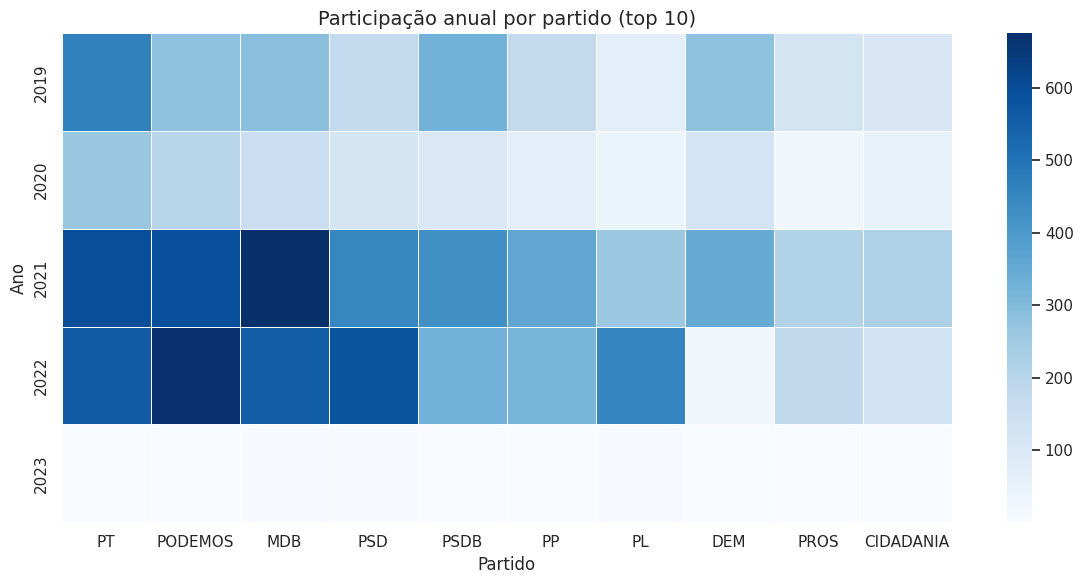

In [61]:
top_partidos_lista = (
    df['Partido']
    .dropna()
    .value_counts()
    .head(10)
    .index
    .tolist()
)
heatmap_data = (
    df[df['Partido'].isin(top_partidos_lista)]
      .dropna(subset=['ano'])
      .groupby(['ano', 'Partido'])
      .size()
      .unstack(fill_value=0)
      .reindex(columns=top_partidos_lista)
      .sort_index()
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=0.5, ax=ax)
ax.set(title='Participação anual por partido (top 10)', xlabel='Partido', ylabel='Ano')
plt.tight_layout()
heatmap_data


## Analisar discursos por autor, partido e UF

### Discursos por autor

,NomeAutor,discursos
0,Izalci Lucas,704
1,Paulo Paim,676
2,Eduardo Girão,593
3,Rodrigo Pacheco,496
4,Jorge Kajuru,458
5,Esperidião Amin,409
6,Zenaide Maia,398
7,Jean-Paul Prates,355
8,Paulo Rocha,332
9,Nelsinho Trad,311


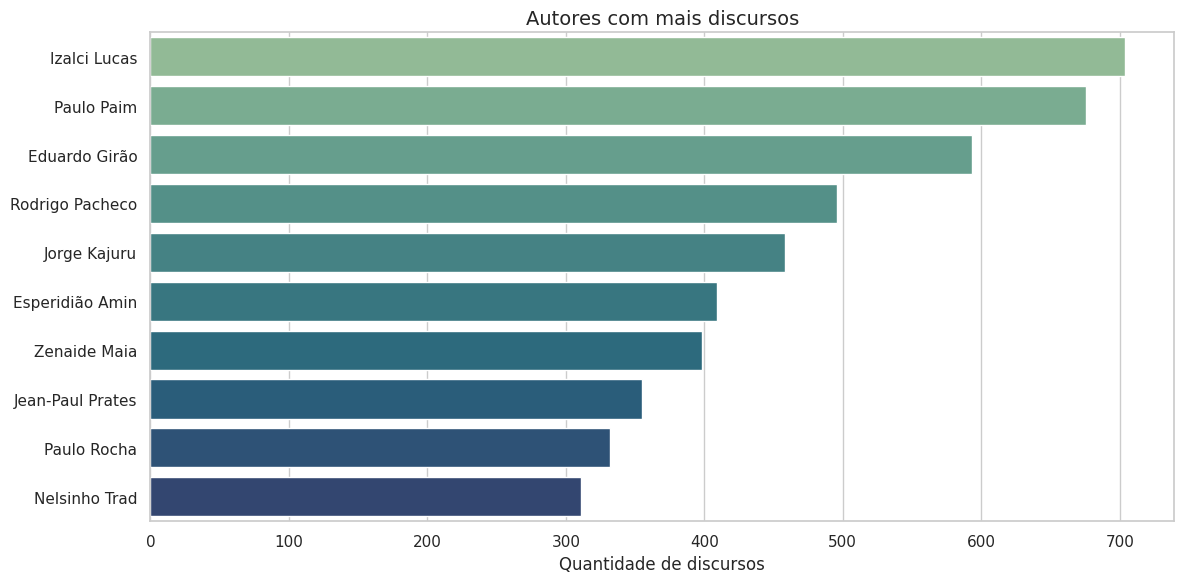

In [62]:
discursos_por_autor = (
    df.groupby('NomeAutor')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .rename('discursos')
      .reset_index()
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=discursos_por_autor, y='NomeAutor', x='discursos', hue='NomeAutor', ax=ax, palette='crest')
ax.set(title='Autores com mais discursos', xlabel='Quantidade de discursos', ylabel='')
plt.tight_layout()
discursos_por_autor

### Discursos por partido

,Partido,discursos
0,PT,1890
1,PODEMOS,1743
2,MDB,1675
3,PSD,1330
4,PSDB,1179
5,PP,919
6,PL,832
7,DEM,779
8,PROS,548
9,CIDADANIA,511


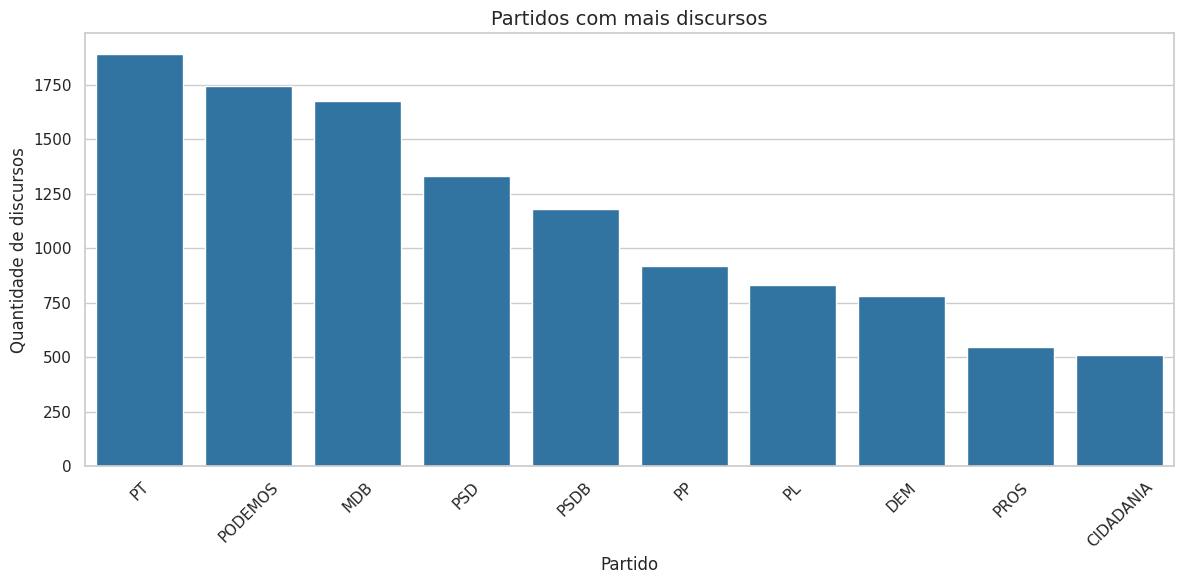

In [63]:
discursos_por_partido = (
    df.groupby('Partido')
      .size()
      .sort_values(ascending=False)
      .head(10)
      .rename('discursos')
      .reset_index()
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=discursos_por_partido, x='Partido', y='discursos', ax=ax)
ax.set(title='Partidos com mais discursos', xlabel='Partido', ylabel='Quantidade de discursos')
plt.xticks(rotation=45)
plt.tight_layout()
discursos_por_partido

### Discursos por UF

,UF,discursos
0,RS,1128
1,DF,1056
2,RN,839
3,MG,804
4,CE,708
5,MS,625
6,GO,619
7,MT,571
8,SC,565
9,PR,564


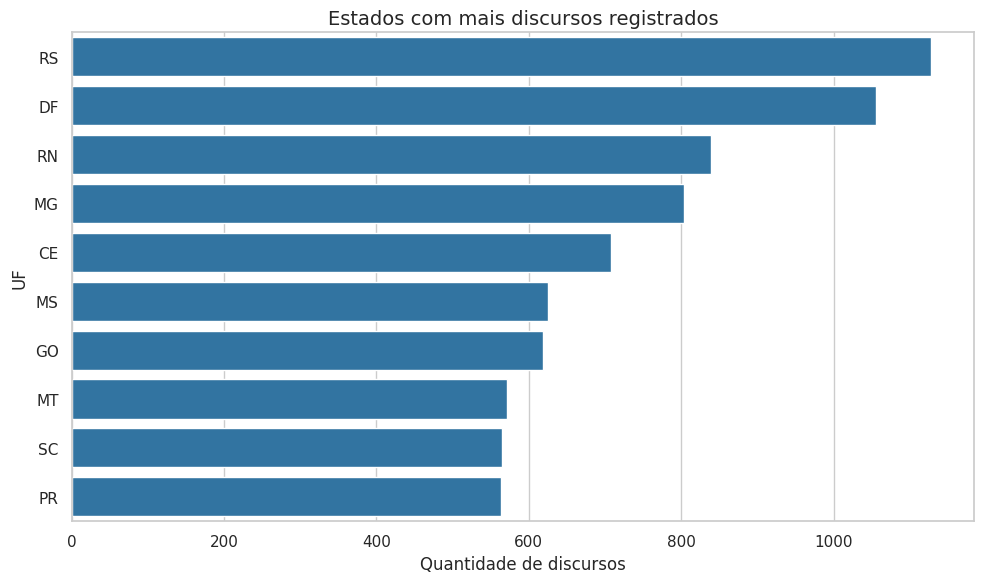

In [64]:
discursos_por_partido = (
    df['UF']
      .replace('', 'Não informado')
      .value_counts()
      .head(10)
      .rename('discursos')
      .reset_index()
      .rename(columns={'index': 'UF'})
)
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=discursos_por_partido, x='discursos', y='UF', ax=ax)
ax.set(title='Estados com mais discursos registrados', xlabel='Quantidade de discursos', ylabel='UF')
plt.tight_layout()
discursos_por_partido

### Discursos por tipo de uso da palavra

,TipoUsoPalavra.Descricao,discursos
0,Discurso,5668
1,Pela ordem,2620
2,Discussão,1618
3,Orientação à bancada,1340
4,Não classificado,906
5,Fala da Presidência,720
6,Exposição de convidado,716
7,Pela Liderança,643
8,Como Relator,409
9,Como Relator - Para proferir parecer,360


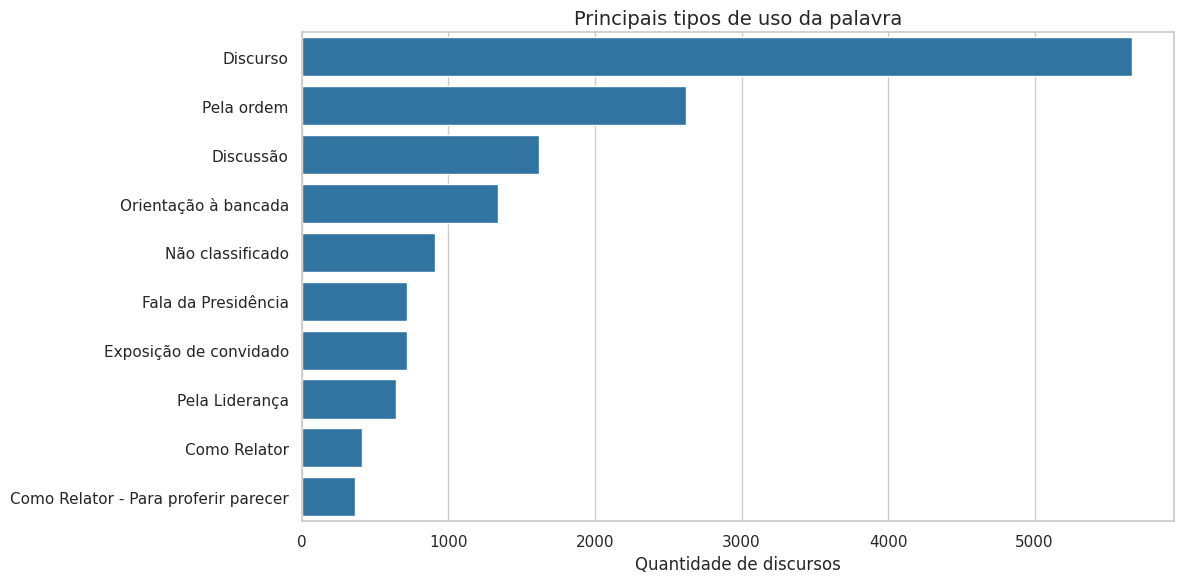

In [65]:
tipo_uso_palavra = (
    df['TipoUsoPalavra.Descricao']
      .replace('', 'Não informado')
      .value_counts()
      .head(10)
      .rename('discursos')
      .reset_index()
      .rename(columns={'index': 'Tipo de uso'})
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=tipo_uso_palavra, x='discursos', y='TipoUsoPalavra.Descricao', ax=ax)
ax.set(title='Principais tipos de uso da palavra', xlabel='Quantidade de discursos', ylabel='')
plt.tight_layout()
tipo_uso_palavra

## Analisar texto dos discursos

Todos as colunas vazias devem conter uma string vazia

In [66]:
text_columns = [
    'Resumo', 'Indexacao', 'TextoIntegral', 'TextoIntegralTxt',
    'TextoDiscursoIntegral', 'TipoUsoPalavra.Descricao', 'TipoUsoPalavra.Sigla',
    'TipoUsoPalavra.Codigo', 'TipoUsoPalavra.IndicadorAtivo',
    'Publicacoes.Publicacao', 'Apartes.Aparteante', 'CargoAutor',
    'OrgaoAutor', 'PaisAutor'
]
for col in text_columns:
    if col in df.columns:
        df[col] = df[col].fillna('').astype(str)

df[df['TextoDiscursoIntegral'] == '']

,id,CodigoPronunciamento,Casa,Data,Resumo,Indexacao,TextoIntegral,TextoIntegralTxt,UrlTextoBinario,TipoAutor,FuncaoAutor,NomeAutor,CodigoParlamentar,Partido,UF,TipoUsoPalavra.Codigo,TipoUsoPalavra.Sigla,TipoUsoPalavra.Descricao,TipoUsoPalavra.IndicadorAtivo,Publicacoes.Publicacao,Apartes.Aparteante,__janela_inicio,__janela_fim,CargoAutor,OrgaoAutor,PaisAutor,TextoDiscursoIntegral,ok,status,msg,ano,mes,dia_semana
1607,455207,455207,Congresso Nacional,2019-06-11,Considerações sobre a importância para o País ...,"COMENTARIO, IMPORTANCIA, APROVAÇÃO, PROJETO DE...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Marcelo Castro,742,MDB,PI,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-06-13', 'FontePublic...",,2019-06-05,2019-07-05,,,,,False,404,404 (sem texto integral),2019,2019-06,Terça
2803,461050,461050,Senado Federal,2019-11-01,"Defesa de uma reforma tributária, em tramitaçã...","DEFESA, REFORMA TRIBUTARIA, TRAMITAÇÃO, CONGRE...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Confúcio Moura,475,MDB,RO,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-11-02', 'FontePublic...",,2019-10-07,2019-11-06,,,,,False,404,404 (sem texto integral),2019,2019-11,Sexta
3365,462708,462708,Congresso Nacional,2019-11-19,Encerramento da Sessão Solene destinada a come...,"ENCERRAMENTO, SESSÃO SOLENE, DESTINAÇÃO, COMEM...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Jorginho Mello,5350,PL,SC,4824,FP,Fala da Presidência,Sim,"[{'DataPublicacao': '2019-11-21', 'FontePublic...",,2019-11-07,2019-12-07,,,,,False,404,404 (sem texto integral),2019,2019-11,Terça
3366,462707,462707,Congresso Nacional,2019-11-19,Sessão Solene destinada a comemorar a Semana G...,"SESSÃO SOLENE, DESTINAÇÃO, COMEMORAÇÃO, SEMANA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Autor Externo,EXTERNO,CARLOS ALEXANDRE DA COSTA,None,None,None,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-11-21', 'FontePublic...",,2019-11-07,2019-12-07,,,,,False,404,404 (sem texto integral),2019,2019-11,Terça
3367,462705,462705,Congresso Nacional,2019-11-19,Sessão Solene destinada a comemorar a Semana G...,"SESSÃO SOLENE, DESTINAÇÃO, COMEMORAÇÃO, SEMANA...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Autor Externo,EXTERNO,ALCIDE ANDRADE,None,None,None,4819,DIS,Discurso,Sim,"[{'DataPublicacao': '2019-11-21', 'FontePublic...",,2019-11-07,2019-12-07,,,,,False,404,404 (sem texto integral),2019,2019-11,Terça
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9087,484317,484317,Senado Federal,2021-09-21,"Orientação à bancada, pela Liderança do Govern...","ORIENTAÇÃO, BANCADA, PROPOSTA DE EMENDA A CONS...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Fernando Bezerra Coelho,5540,MDB,PE,11338,POB,Orientação à bancada,Sim,"[{'DataPublicacao': '2021-09-22', 'FontePublic...",,2021-09-19,2021-10-19,,,,,False,404,404 (sem texto integral),2021,2021-09,Terça
9089,484315,484315,Senado Federal,2021-09-21,"Orientação à bancada, pelo Partido PROS, sobre...","ORIENTAÇÃO, BANCADA, PROPOSTA DE EMENDA A CONS...",https://www25.senado.leg.br/web/atividade/pron...,https://legis.senado.leg.br/dadosabertos/discu...,https://legis.senado.leg.br/dadosabertos/discu...,Senador(a),SENADOR,Telmário Mota,5535,PROS,RR,11338,POB,Orientação à bancada,Sim,"[{'Data

### Palavras e caracteres por discurso

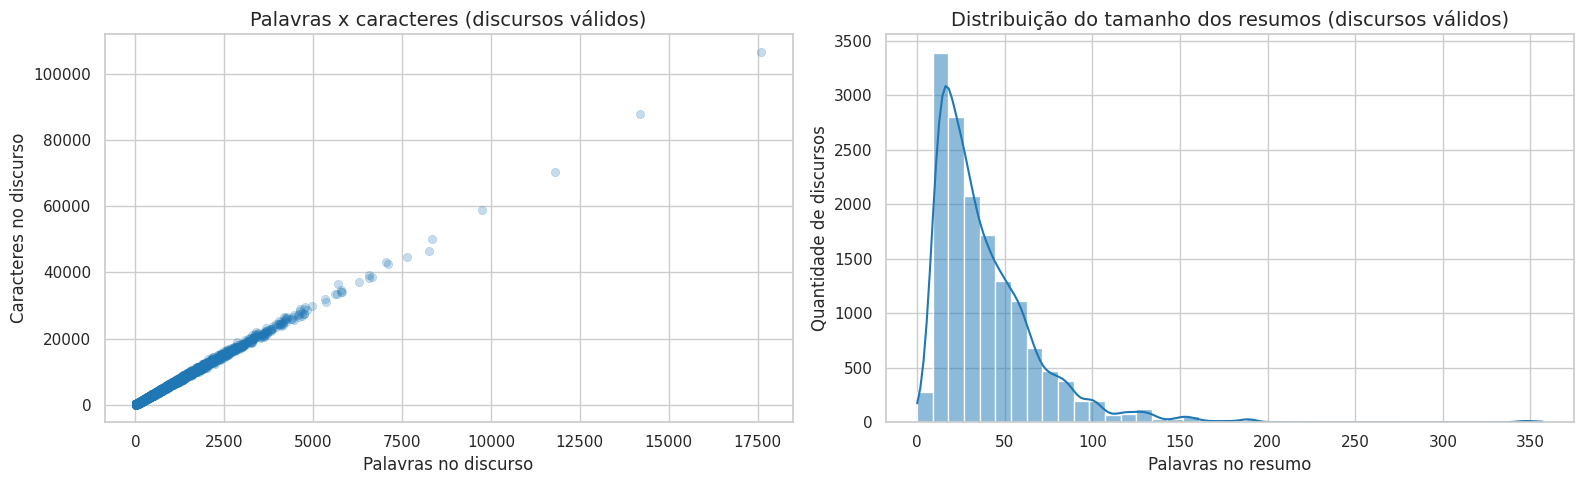

In [67]:

df['texto_len_palavras'] = df['TextoDiscursoIntegral'].str.split().str.len()
df['texto_len_caracteres'] = df['TextoDiscursoIntegral'].str.len()
df['resumo_len_palavras'] = df['Resumo'].str.split().str.len()

mask_texto_sem_conteudo = (
    df['TextoDiscursoIntegral'].str.strip() == ''
) | (df['texto_len_palavras'] == 0) | (df['texto_len_caracteres'] == 0)

df_texto_valido = df.loc[~mask_texto_sem_conteudo].copy()
df_texto_sem_conteudo = df.loc[mask_texto_sem_conteudo].copy()

df[['id', 'texto_len_palavras', 'texto_len_caracteres', 'resumo_len_palavras']].head()

amostra = df_texto_valido[['texto_len_palavras', 'texto_len_caracteres']].dropna()
if len(amostra) > 5000:
    amostra = amostra.sample(5000, random_state=42)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.scatterplot(
    data=amostra,
    x='texto_len_palavras',
    y='texto_len_caracteres',
    ax=axes[0],
    alpha=0.25,
    edgecolor=None
)
axes[0].set(
    title='Palavras x caracteres (discursos válidos)',
    xlabel='Palavras no discurso',
    ylabel='Caracteres no discurso'
)

sns.histplot(
    data=df_texto_valido,
    x='resumo_len_palavras',
    bins=40,
    kde=True,
    ax=axes[1]
)
axes[1].set(
    title='Distribuição do tamanho dos resumos (discursos válidos)',
    xlabel='Palavras no resumo',
    ylabel='Quantidade de discursos'
)

plt.tight_layout()


### Medidas descritivas dos comprimentos dos discursos

Selecionamos três variáveis numéricas derivadas dos textos para sintetizar o tamanho dos discursos: quantidade de palavras e caracteres do texto integral e quantidade de palavras do resumo. As métricas a seguir contemplam medidas de tendência central (média, mediana e moda) e de dispersão (desvio padrão, valores mínimos e máximos). Para evitar distorções, consideramos apenas os discursos cujo texto integral está disponível e possui ao menos uma palavra e um caractere.

,Média,Mediana,Moda,Desvio padrão,Mínimo,Máximo
Variável,,,,,,
Palavras no discurso completo,761.22,492,22,885.90,9,"17,602"
Caracteres no discurso completo,"4,655.02","3,002",139,"5,358.86",53,"106,610"
Palavras no resumo,38.95,31,16,30.23,0,357


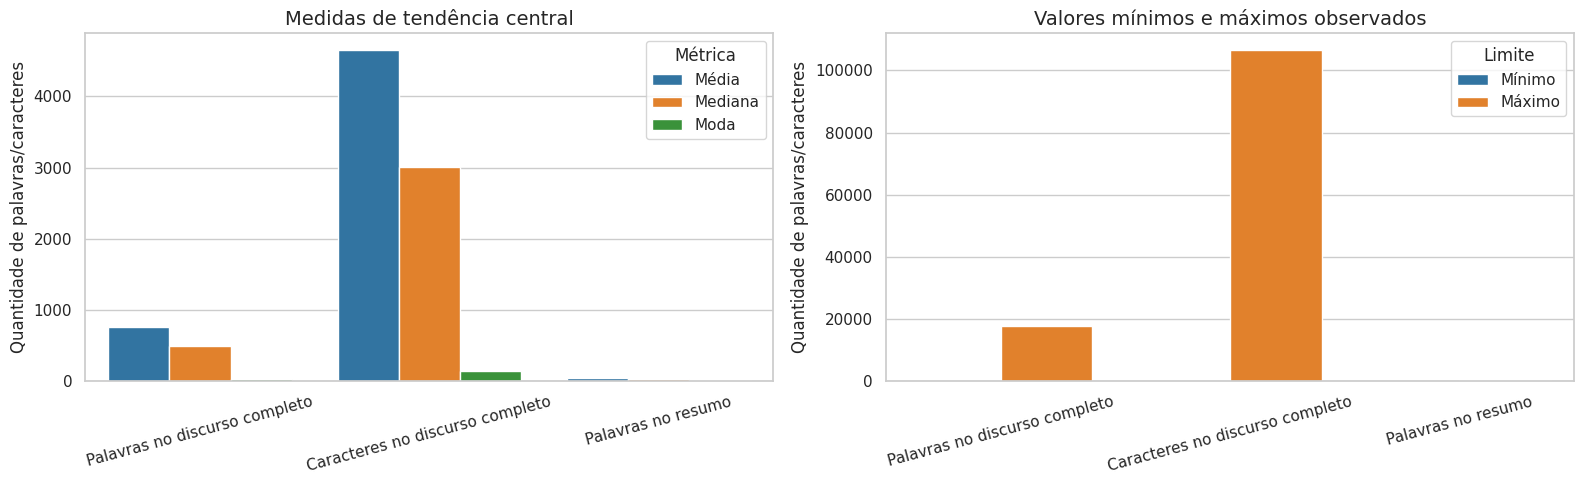

In [68]:

variaveis_numericas = {
    'texto_len_palavras': 'Palavras no discurso completo',
    'texto_len_caracteres': 'Caracteres no discurso completo',
    'resumo_len_palavras': 'Palavras no resumo',
}

estatisticas = []
for coluna, descricao in variaveis_numericas.items():
    serie = df_texto_valido[coluna].dropna()
    moda = serie.mode()
    estatisticas.append({
        'Variável': descricao,
        'Média': serie.mean(),
        'Mediana': serie.median(),
        'Moda': moda.iloc[0] if not moda.empty else np.nan,
        'Desvio padrão': serie.std(ddof=1),
        'Mínimo': serie.min(),
        'Máximo': serie.max(),
    })

metricas_tamanho = pd.DataFrame(estatisticas).set_index('Variável')
formatacao_metricas = {
    'Média': '{:,.2f}'.format,
    'Mediana': '{:,.0f}'.format,
    'Moda': '{:,.0f}'.format,
    'Desvio padrão': '{:,.2f}'.format,
    'Mínimo': '{:,.0f}'.format,
    'Máximo': '{:,.0f}'.format,
}

display(metricas_tamanho.style.format(formatacao_metricas))

metricas_tendencia = (
    metricas_tamanho[['Média', 'Mediana', 'Moda']]
    .reset_index()
    .melt(id_vars='Variável', var_name='Métrica', value_name='Quantidade')
)
metricas_amplitude = (
    metricas_tamanho[['Mínimo', 'Máximo']]
    .reset_index()
    .melt(id_vars='Variável', var_name='Limite', value_name='Quantidade')
)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(data=metricas_tendencia, x='Variável', y='Quantidade', hue='Métrica', ax=axes[0])
axes[0].set(title='Medidas de tendência central', xlabel='', ylabel='Quantidade de palavras/caracteres')
axes[0].tick_params(axis='x', rotation=15)

sns.barplot(data=metricas_amplitude, x='Variável', y='Quantidade', hue='Limite', ax=axes[1])
axes[1].set(title='Valores mínimos e máximos observados', xlabel='', ylabel='Quantidade de palavras/caracteres')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()


### Falhas de cobertura dos textos integrais

Para quantificar as lacunas, identificamos os discursos sem texto integral ou cujo processamento resultou em zero palavras/caracteres. A tabela resume o volume total de registros afetados e as visualizações a seguir detalham a proporção desses casos por ano, por autor e por tipo de uso da palavra.

,Indicador,Quantidade,Proporção (%)
0,Total de discursos,15729,100.00
1,Sem texto integral ou com zero palavras/caract...,690,4.39


/tmp/ipykernel_7161/2075133003.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cobertura_autor, y='NomeAutor', x='proporcao', ax=axes[1], palette='Reds_r')
/tmp/ipykernel_7161/2075133003.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cobertura_tipo, y='TipoUsoPalavra.Descricao', x='proporcao', ax=axes[2], palette='Purples')


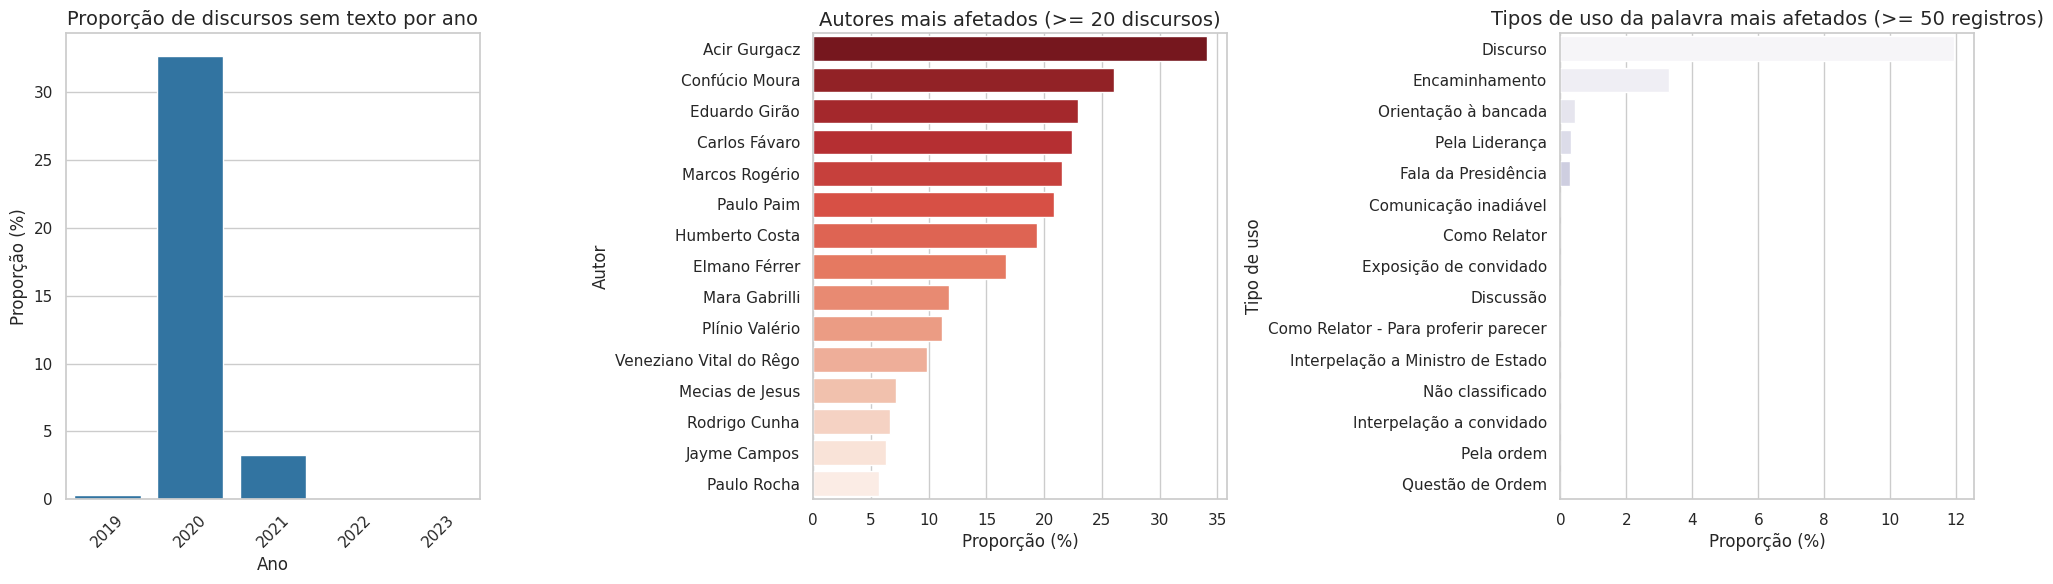

In [69]:

df_cobertura = df.copy()
df_cobertura['flag_texto_invalido'] = mask_texto_sem_conteudo

total_discursos = len(df_cobertura)
sem_texto = int(df_cobertura['flag_texto_invalido'].sum())

resumo_cobertura = pd.DataFrame([
    {
        'Indicador': 'Total de discursos',
        'Quantidade': total_discursos,
        'Proporção (%)': 100.0
    },
    {
        'Indicador': 'Sem texto integral ou com zero palavras/caracteres',
        'Quantidade': sem_texto,
        'Proporção (%)': round((sem_texto / total_discursos) * 100, 2)
    }
])

display(resumo_cobertura)

cobertura_ano = (
    df_cobertura
    .groupby('ano', dropna=False)
    .agg(total=('id', 'size'), sem_texto=('flag_texto_invalido', 'sum'))
    .assign(proporcao=lambda x: (x['sem_texto'] / x['total']) * 100)
    .reset_index()
)
cobertura_ano['ano'] = cobertura_ano['ano'].fillna('Sem data')

cobertura_autor = (
    df_cobertura
    .groupby('NomeAutor')
    .agg(total=('id', 'size'), sem_texto=('flag_texto_invalido', 'sum'))
    .assign(proporcao=lambda x: (x['sem_texto'] / x['total']) * 100)
    .query('total >= 20')
    .sort_values('proporcao', ascending=False)
    .head(15)
    .reset_index()
)

cobertura_tipo = (
    df_cobertura
    .groupby('TipoUsoPalavra.Descricao')
    .agg(total=('id', 'size'), sem_texto=('flag_texto_invalido', 'sum'))
    .assign(proporcao=lambda x: (x['sem_texto'] / x['total']) * 100)
    .query('total >= 50')
    .sort_values('proporcao', ascending=False)
    .reset_index()
)

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.barplot(data=cobertura_ano, x='ano', y='proporcao', ax=axes[0], color=sns.color_palette()[0])
axes[0].set(title='Proporção de discursos sem texto por ano', xlabel='Ano', ylabel='Proporção (%)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=cobertura_autor, y='NomeAutor', x='proporcao', ax=axes[1], palette='Reds_r')
axes[1].set(title='Autores mais afetados (>= 20 discursos)', xlabel='Proporção (%)', ylabel='Autor')

sns.barplot(data=cobertura_tipo, y='TipoUsoPalavra.Descricao', x='proporcao', ax=axes[2], palette='Purples')
axes[2].set(title='Tipos de uso da palavra mais afetados (>= 50 registros)', xlabel='Proporção (%)', ylabel='Tipo de uso')

plt.tight_layout()


### Comentário sobre as métricas

Após desconsiderar os 690 discursos (4,4% do total) sem texto integral válido, observamos que os pronunciamentos completos mantêm média em torno de 761 palavras e 4.655 caracteres, com medianas inferiores (492 palavras e 3.002 caracteres). A diferença entre médias e medianas, somada aos altos desvios padrão, confirma uma distribuição assimétrica puxada por poucos discursos muito extensos — alguns ultrapassam 17 mil palavras. A moda passa a destacar valores baixos (22 palavras e 139 caracteres), reforçando a presença de intervenções curtas mesmo entre os registros válidos. Nos resumos, a coerência permanece: mediana de 31 palavras, desvio padrão moderado (≈30) e máximo de 357 palavras indicam padronização mais rígida nesse campo.

A análise de cobertura mostra que 2020 concentra a maior parte das lacunas (32,7% dos discursos daquele ano sem texto integral), possivelmente devido a ajustes operacionais durante o início da pandemia. Entre os autores com volume expressivo de falas (≥20 discursos), nomes como Acir Gurgacz, Confúcio Moura e Eduardo Girão apresentam mais de 20% de discursos com texto ausente — um ponto crítico para investigações longitudinais. Também chama atenção o fato de 11,9% dos registros classificados como “Discurso” estarem vazios, enquanto outras categorias quase não sofrem com o problema. Esses indícios sugerem priorizar a revisão e recuperação dos textos integrais antes de avançar para análises semânticas ou comparações entre parlamentares.

### Distribuição do tamanho dos discursos

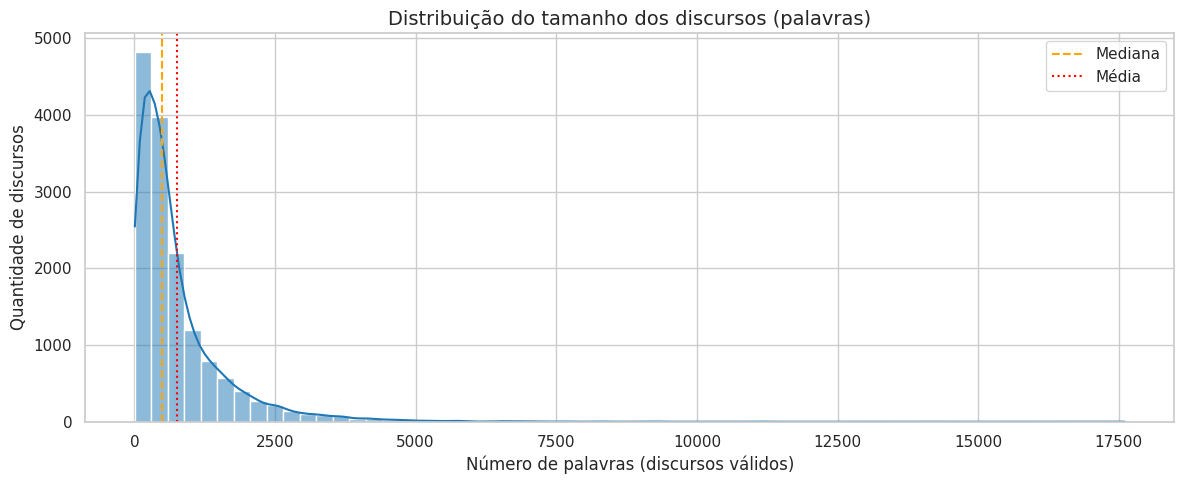

In [70]:

fig, ax = plt.subplots(figsize=(12, 5))
sns.histplot(df_texto_valido['texto_len_palavras'], bins=60, kde=True, ax=ax)
ax.set(
    title='Distribuição do tamanho dos discursos (palavras)',
    xlabel='Número de palavras (discursos válidos)',
    ylabel='Quantidade de discursos'
)
ax.axvline(df_texto_valido['texto_len_palavras'].median(), color='orange', linestyle='--', label='Mediana')
ax.axvline(df_texto_valido['texto_len_palavras'].mean(), color='red', linestyle=':', label='Média')
ax.legend()
plt.tight_layout()


### Tamanho do discurso (palavras e caracteres)

,palavras,caracteres
count,15039.00,15039.00
mean,761.22,4655.02
std,885.90,5358.86
min,9.00,53.00
25%,230.00,1410.50
50%,492.00,3002.00
75%,946.50,5833.00
max,17602.00,106610.00


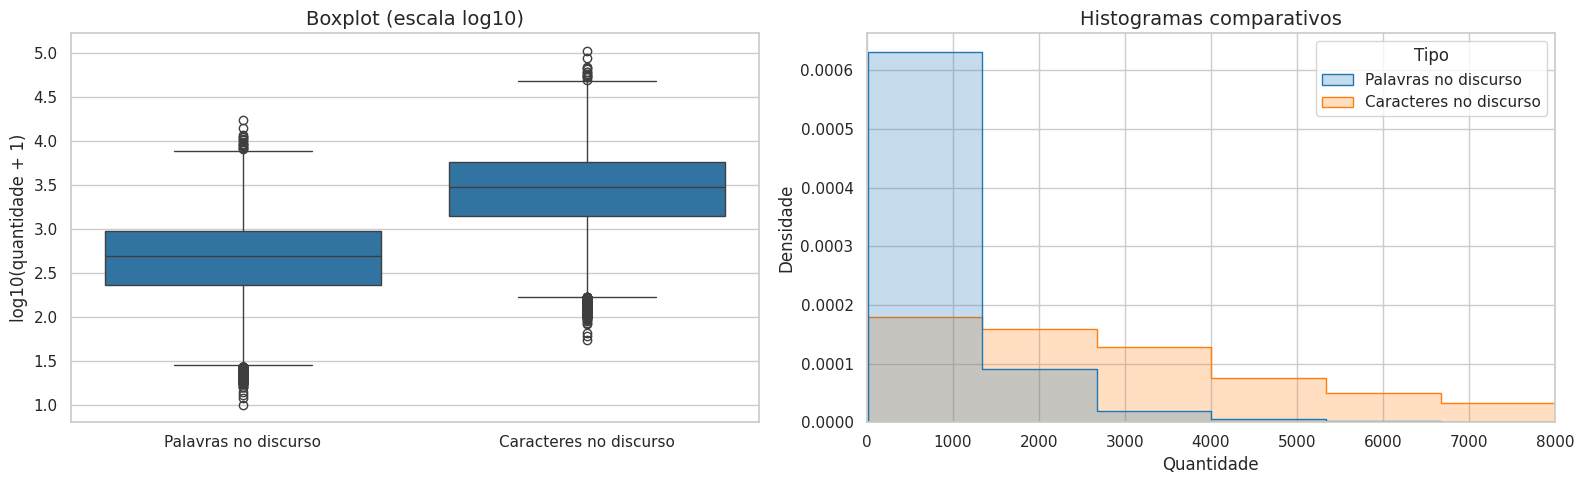

In [71]:

tamanho_discursos = pd.DataFrame({
    'palavras': df_texto_valido['texto_len_palavras'].describe().round(2),
    'caracteres': df_texto_valido['texto_len_caracteres'].describe().round(2)
})
display(tamanho_discursos)

comprimentos = df_texto_valido[['texto_len_palavras', 'texto_len_caracteres']].rename(columns={
    'texto_len_palavras': 'Palavras no discurso',
    'texto_len_caracteres': 'Caracteres no discurso'
})
comprimentos_melt = comprimentos.melt(var_name='Tipo', value_name='Quantidade').dropna()
comprimentos_melt['log10_quantidade'] = np.log10(comprimentos_melt['Quantidade'] + 1)

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(data=comprimentos_melt, x='Tipo', y='log10_quantidade', ax=axes[0])
axes[0].set(title='Boxplot (escala log10)', xlabel='', ylabel='log10(quantidade + 1)')

sns.histplot(data=comprimentos_melt, x='Quantidade', hue='Tipo', element='step', stat='density', common_norm=False, bins=80, ax=axes[1])
axes[1].set(title='Histogramas comparativos', xlabel='Quantidade', ylabel='Densidade')
axes[1].set_xlim(0, 8000)

plt.tight_layout()


## Principais achados

- Os discursos se concentram entre 2019 e 2022, com picos mensais próximos às sessões de maior atividade legislativa.
- Autores como os líderes partidários respondem pelo maior volume de pronunciamentos, e PT, Podemos e MDB aparecem como partidos mais prolíficos.
- A maioria dos discursos possui texto integral disponível, com mediana de aproximadamente 464 palavras (≈2,8 mil caracteres) e cauda longa que indica pronunciamentos extensos.
- Tipos de uso da palavra relacionados a relatorias e lideranças dominam o plenário, reforçando o papel institucional desses cargos.
- A distribuição semanal mostra concentração entre terça e quinta-feira, dias tradicionalmente destinados às deliberações no Senado.